In [1]:
import tensorflow as tf
import numpy as np

In [2]:
max_features = 20000
embedding_len = 128
sequence_length = 500

## 1. Load data

In [3]:
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.imdb.load_data(num_words=max_features)
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=sequence_length)
x_val = tf.keras.preprocessing.sequence.pad_sequences(x_val, maxlen=sequence_length)

## 2. Model: Basic MLP

In [4]:
# A integer input for vocab indices.
inputs = tf.keras.Input(shape=(sequence_length,), dtype="int64")

x = tf.keras.layers.Embedding(max_features, embedding_len)(inputs)

x = tf.keras.layers.Flatten()(x)
dense1 = tf.keras.layers.Dense(1024, activation="relu")(x)
predictions = tf.keras.layers.Dense(1, activation="sigmoid", name="predictions")(dense1)

model = tf.keras.Model(inputs, predictions)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding (Embedding)       (None, 500, 128)          2560000   
                                                                 
 flatten (Flatten)           (None, 64000)             0         
                                                                 
 dense (Dense)               (None, 1024)              65537024  
                                                                 
 predictions (Dense)         (None, 1)                 1025      
                                                                 
Total params: 68,098,049
Trainable params: 68,098,049
Non-trainable params: 0
_________________________________________________________________


## 3. Training

In [5]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size = 64, epochs = 10, validation_data = (x_val, y_val))

Epoch 1/10
391/391 [==============================] - 16s 34ms/step - loss: 0.5266 - accuracy: 0.7119 - val_loss: 0.3215 - val_accuracy: 0.8631
Epoch 2/10
391/391 [==============================] - 13s 33ms/step - loss: 0.1336 - accuracy: 0.9508 - val_loss: 0.3612 - val_accuracy: 0.8602
Epoch 3/10
391/391 [==============================] - 13s 32ms/step - loss: 0.0121 - accuracy: 0.9981 - val_loss: 0.4315 - val_accuracy: 0.8684
Epoch 4/10
391/391 [==============================] - 12s 30ms/step - loss: 9.8265e-04 - accuracy: 1.0000 - val_loss: 0.5178 - val_accuracy: 0.8626
Epoch 5/10
391/391 [==============================] - 11s 29ms/step - loss: 2.3691e-04 - accuracy: 1.0000 - val_loss: 0.5193 - val_accuracy: 0.8721
Epoch 6/10
391/391 [==============================] - 12s 30ms/step - loss: 1.0124e-04 - accuracy: 1.0000 - val_loss: 0.5490 - val_accuracy: 0.8728
Epoch 7/10
391/391 [==============================] - 11s 29ms/step - loss: 5.8385e-05 - accuracy: 1.0000 - val_loss: 0.5757

<Figure size 1000x1000 with 0 Axes>

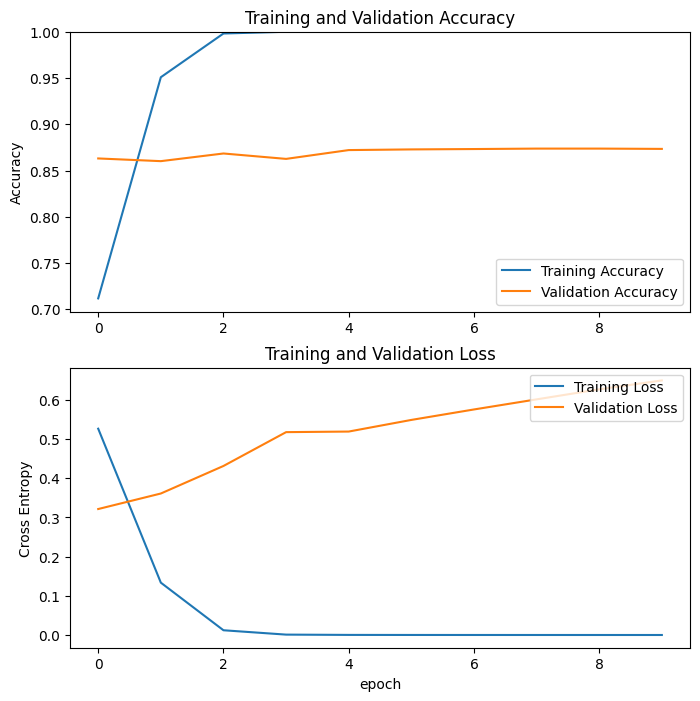

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()